In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Data Driven Analytics - 2/Sentiment Analysis Project

/content/gdrive/.shortcut-targets-by-id/1QpTu69UFzF7HZ9KMFY_n2cAd83BRs7HT/Data Driven Analytics - 2/Sentiment Analysis Project


In [ ]:
df=pd.read_csv('TESLA_stock_prices.csv')
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,month,year
0,0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,TSLA,1,2018
1,1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,TSLA,1,2018
2,2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,TSLA,1,2018
3,3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,TSLA,1,2018
4,4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,TSLA,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
750,750,2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000,TSLA,12,2020
751,751,2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800,TSLA,12,2020
752,752,2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800,TSLA,12,2020
753,753,2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400,TSLA,12,2020


In [ ]:
df=df[['Date','Open','Adj Close']]
df

,Date,Open,Adj Close
0,2018-01-02,20.799999,21.368668
1,2018-01-03,21.400000,21.150000
2,2018-01-04,20.858000,20.974667
3,2018-01-05,21.108000,21.105333
4,2018-01-08,21.066668,22.427334
...,...,...,...
750,2020-12-23,210.733337,215.326660
751,2020-12-24,214.330002,220.589996
752,2020-12-28,224.836670,221.229996
753,2020-12-29,220.333328,221.996674


In [ ]:
cl=df['Adj Close']

In [ ]:
n=len(df); n

755

In [ ]:
#Log Returns
lr=[np.nan]
for i in range(1,n):
  lr.append(np.log(cl[i]/cl[i-1]))

In [ ]:
df['log_return']=lr
df

<ipython-input-85-b7d0df61fd37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_return']=lr


,Date,Open,Adj Close,log_return
0,2018-01-02,20.799999,21.368668,NaN
1,2018-01-03,21.400000,21.150000,-0.010286
2,2018-01-04,20.858000,20.974667,-0.008325
3,2018-01-05,21.108000,21.105333,0.006210
4,2018-01-08,21.066668,22.427334,0.060755
...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769
751,2020-12-24,214.330002,220.589996,0.024150
752,2020-12-28,224.836670,221.229996,0.002897
753,2020-12-29,220.333328,221.996674,0.003460


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        755 non-null    object 
 1   Open        755 non-null    float64
 2   Adj Close   755 non-null    float64
 3   log_return  754 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.7+ KB


In [ ]:
np.percentile(lr[1:],25)

-0.017704543956372564

In [ ]:
np.percentile(lr[1:],75)

0.022508412334936268

In [ ]:
np.mean(lr[1:])

0.0031605533976247825

In [ ]:
#5 Day MA
v=5
ma_5=[]
for i in range(v-1):
  ma_5.append(np.nan)
for i in range(v,(n+1)):
  mn=np.mean(df['Adj Close'][(i-v):i])
  ma_5.append(mn)

In [ ]:
#10 Day MA
v=10
ma_10=[]
for i in range(v-1):
  ma_10.append(np.nan)
for i in range(v,(n+1)):
  mn=np.mean(df['Adj Close'][(i-v):i])
  ma_10.append(mn)

In [ ]:
#10 Day MA (Centered)
v=11
ma_10_centered=[]
for i in range(v-1):
  ma_10_centered.append(np.nan)
for i in range(v,(n+1)):
  mn=np.mean(ma_10[(i-2):i])
  ma_10_centered.append(mn)

In [ ]:
#15 Day MA
v=15
ma_15=[]
for i in range(v-1):
  ma_15.append(np.nan)
for i in range(v,(n+1)):
  mn=np.mean(df['Adj Close'][(i-v):i])
  ma_15.append(mn)

In [ ]:
df['MA_5']=ma_5
df['MA_10']=ma_10
df['MA_10_centered']=ma_10_centered
df['MA_15']=ma_15
df

<ipython-input-94-ee58900fc78b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_5']=ma_5
<ipython-input-94-ee58900fc78b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_10']=ma_10
<ipython-input-94-ee58900fc78b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15
0,2018-01-02,20.799999,21.368668,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,21.400000,21.150000,-0.010286,NaN,NaN,NaN,NaN
2,2018-01-04,20.858000,20.974667,-0.008325,NaN,NaN,NaN,NaN
3,2018-01-05,21.108000,21.105333,0.006210,NaN,NaN,NaN,NaN
4,2018-01-08,21.066668,22.427334,0.060755,21.405200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555


In [ ]:
def classify(m5,m10c,m15):
  sent=[]
  for i in range(14):
    sent.append(np.nan)
  for i in range(14,n):
    if m5[i]>m10c[i]:
      if m10c[i]>m15[i]: sent.append('Positive')
      else: sent.append('Neutral')
    elif m5[i]<m10c[i]:
      if m10c[i]<m15[i]: sent.append('Negative')
      else: sent.append('Neutral')
  
  return sent

In [ ]:
df['MA_label']=classify(df.MA_5,df.MA_10_centered,df.MA_15)
df

<ipython-input-96-da85cfa07ff1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_label']=classify(df.MA_5,df.MA_10_centered,df.MA_15)


,Date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15,MA_label
0,2018-01-02,20.799999,21.368668,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,21.400000,21.150000,-0.010286,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,20.858000,20.974667,-0.008325,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,21.108000,21.105333,0.006210,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,21.066668,22.427334,0.060755,21.405200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665,Positive
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443,Positive
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110,Positive
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            755 non-null    object 
 1   Open            755 non-null    float64
 2   Adj Close       755 non-null    float64
 3   log_return      754 non-null    float64
 4   MA_5            751 non-null    float64
 5   MA_10           746 non-null    float64
 6   MA_10_centered  745 non-null    float64
 7   MA_15           741 non-null    float64
 8   MA_label        741 non-null    object 
dtypes: float64(7), object(2)
memory usage: 53.2+ KB


In [ ]:
pred=pd.read_excel('confusion_matrix.xlsx')
pred

,Date,Result_MA,Label,Predicted_Values,Label.1,Adj Close,log_return
0,2018-01-02,NaN,NaN,NaN,NaN,21.368668,#VALUE!
1,2018-01-03,NaN,Negative,NaN,Negative,21.150000,-0.010286
2,2018-01-04,NaN,Negative,NaN,Negative,20.974667,-0.008325
3,2018-01-05,NaN,Neutral,NaN,Neutral,21.105333,0.00621
4,2018-01-08,NaN,Positive,NaN,Positive,22.427334,0.060755
...,...,...,...,...,...,...,...
750,2020-12-23,Positive,Neutral,Positive,Neutral,215.326660,0.008769
751,2020-12-24,Positive,Positive,Positive,Positive,220.589996,0.02415
752,2020-12-28,Positive,Neutral,Positive,Neutral,221.229996,0.002897
753,2020-12-29,Positive,Neutral,Positive,Neutral,221.996674,0.00346


In [ ]:
pred1=pred.Predicted_Values; pred1

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
750    Positive
751    Positive
752    Positive
753    Positive
754    Positive
Name: Predicted_Values, Length: 755, dtype: object

In [ ]:
df['Predicted_Values']=pred1
df

<ipython-input-100-d87d9a85240c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Values']=pred1


,Date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15,MA_label,Predicted_Values
0,2018-01-02,20.799999,21.368668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,21.400000,21.150000,-0.010286,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,20.858000,20.974667,-0.008325,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,21.108000,21.105333,0.006210,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,21.066668,22.427334,0.060755,21.405200,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665,Positive,Positive
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443,Positive,Positive
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110,Positive,Positive
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555,Positive,Positive


In [ ]:
pred2=pd.read_excel('confusion_matrix.xlsx')
pred2

,Date,Result_MA,Label,Predicted_Values,Label.1,Adj Close,log_return
0,2018-01-02,NaN,NaN,NaN,NaN,21.368668,#VALUE!
1,2018-01-03,NaN,Negative,NaN,Negative,21.150000,-0.010286
2,2018-01-04,NaN,Negative,NaN,Negative,20.974667,-0.008325
3,2018-01-05,NaN,Neutral,NaN,Neutral,21.105333,0.00621
4,2018-01-08,NaN,Positive,NaN,Positive,22.427334,0.060755
...,...,...,...,...,...,...,...
750,2020-12-23,Positive,Neutral,Positive,Neutral,215.326660,0.008769
751,2020-12-24,Positive,Positive,Positive,Positive,220.589996,0.02415
752,2020-12-28,Positive,Neutral,Positive,Neutral,221.229996,0.002897
753,2020-12-29,Positive,Neutral,Positive,Neutral,221.996674,0.00346


In [ ]:
df['MA_Result']=pred.Result_MA
df

,Date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15,MA_label,Predicted_Values,MA_Result
0,2018-01-02,20.799999,21.368668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,21.400000,21.150000,-0.010286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,20.858000,20.974667,-0.008325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,21.108000,21.105333,0.006210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,21.066668,22.427334,0.060755,21.405200,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665,Positive,Positive,Positive
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443,Positive,Positive,Positive
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110,Positive,Positive,Positive
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555,Positive,Positive,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              755 non-null    object 
 1   Open              755 non-null    float64
 2   Adj Close         755 non-null    float64
 3   log_return        754 non-null    float64
 4   MA_5              751 non-null    float64
 5   MA_10             746 non-null    float64
 6   MA_10_centered    745 non-null    float64
 7   MA_15             741 non-null    float64
 8   MA_label          741 non-null    object 
 9   Predicted_Values  741 non-null    object 
 10  MA_Result         741 non-null    object 
dtypes: float64(7), object(4)
memory usage: 65.0+ KB


In [ ]:
def oc(open,close,n):
  x=[]
  for i in range(n):
    delta=close[i]/open[i]-1
    x.append(delta)
  
  return x

In [ ]:
#Returns
def bins(open,close,n):
  bin=[]
  ap=0.0018
  for i in range(n):
    if close[i]>open[i]*(1+ap): t='Positive'
    elif close[i]>open[i]*(1-ap): t='Negative'
    else: t='Neutral'
    bin.append(t)
  
  return bin

In [ ]:
#simple return = current / prev - 1
#log return = log (current / prev)

In [ ]:
df['delta']=oc(df.Open,df['Adj Close'],n)
df

,Date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15,MA_label,Predicted_Values,MA_Result,delta
0,2018-01-02,20.799999,21.368668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027340
1,2018-01-03,21.400000,21.150000,-0.010286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011682
2,2018-01-04,20.858000,20.974667,-0.008325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005593
3,2018-01-05,21.108000,21.105333,0.006210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000126
4,2018-01-08,21.066668,22.427334,0.060755,21.405200,NaN,NaN,NaN,NaN,NaN,NaN,0.064589
...,...,...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665,Positive,Positive,Positive,0.021797
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443,Positive,Positive,Positive,0.029207
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110,Positive,Positive,Positive,-0.016041
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555,Positive,Positive,Positive,0.007549


In [ ]:
np.var(df.delta)

0.001003141005690681

In [ ]:
np.std(df.delta)

0.03167240132498136

<Axes: xlabel='delta', ylabel='Count'>

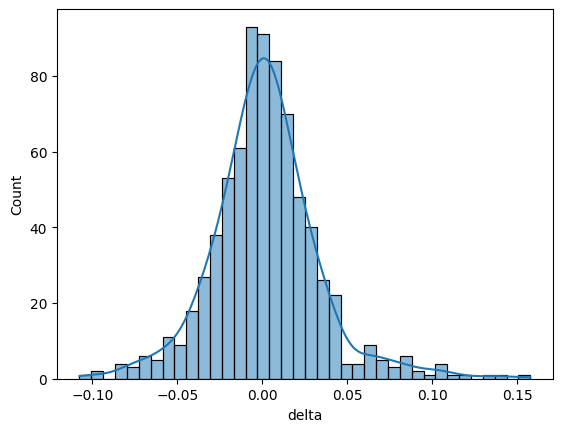

In [ ]:
import seaborn as sns
sns.histplot(df.delta,kde=True)

In [ ]:
np.mean(df.delta)

0.0018303530540180338

In [ ]:
df['bins_ws']=bins(df.Open,df['Adj Close'],n)
df

,Date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15,MA_label,Predicted_Values,MA_Result,delta,bins_ws
0,2018-01-02,20.799999,21.368668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027340,Positive
1,2018-01-03,21.400000,21.150000,-0.010286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011682,Neutral
2,2018-01-04,20.858000,20.974667,-0.008325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005593,Positive
3,2018-01-05,21.108000,21.105333,0.006210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000126,Negative
4,2018-01-08,21.066668,22.427334,0.060755,21.405200,NaN,NaN,NaN,NaN,NaN,NaN,0.064589,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665,Positive,Positive,Positive,0.021797,Positive
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443,Positive,Positive,Positive,0.029207,Positive
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110,Positive,Positive,Positive,-0.016041,Neutral
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555,Positive,Positive,Positive,0.007549,Positive


<Axes: >

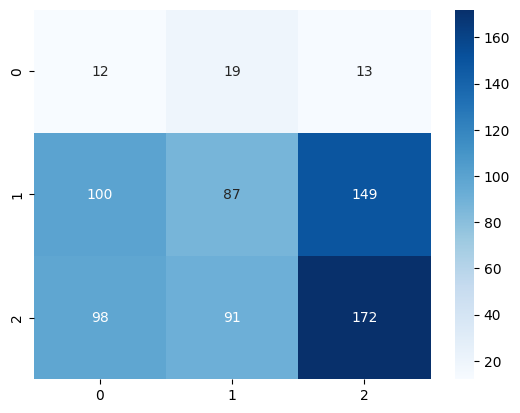

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df['bins_ws'][14:],df['MA_Result'][14:])
sns.heatmap(conf_mat,annot=True,fmt='.5g',cmap='Blues')

In [ ]:
from scipy.stats.distributions import chi2
chi2.ppf(0.95,4)

9.487729036781154

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df['MA_label'][14:],df['Predicted_Values'][14:])

0.6666666666666666

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df['bins_ws'][14:],df['MA_label'][14:])

0.37112010796221323

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df['bins_ws'][14:],df['Predicted_Values'][14:])

0.4709851551956815

In [ ]:
df.Predicted_Values

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
750    Positive
751    Positive
752    Positive
753    Positive
754    Positive
Name: Predicted_Values, Length: 755, dtype: object

In [ ]:
df.bins_ws.value_counts()

Positive    370
Neutral     340
Negative     45
Name: bins_ws, dtype: int64

In [ ]:
confusion_matrix(df['bins_ws'][14:],df['MA_Result'][14:])

array([[ 12,  19,  13],
       [100,  87, 149],
       [ 98,  91, 172]])

In [ ]:
confusion_matrix(df['bins_ws'][14:],df['Predicted_Values'][14:])

array([[  0,  31,  13],
       [  1, 194, 141],
       [  4, 202, 155]])

In [ ]:
pred3=pd.read_csv('KMeans_Sentiment.csv')
pred3

,date,sentiment,sent_lab
0,2018-01-01,0.437500,negative
1,2018-01-02,0.545455,negative
2,2018-01-03,0.645161,neutral
3,2018-01-04,0.650000,neutral
4,2018-01-05,0.485714,negative
...,...,...,...
1091,2020-12-27,0.516129,negative
1092,2020-12-28,0.607843,neutral
1093,2020-12-29,0.510638,negative
1094,2020-12-30,0.625000,neutral


In [ ]:
pred3.sent_lab=pred3.sent_lab.str.capitalize()
pred3

,date,sentiment,sent_lab
0,2018-01-01,0.437500,Negative
1,2018-01-02,0.545455,Negative
2,2018-01-03,0.645161,Neutral
3,2018-01-04,0.650000,Neutral
4,2018-01-05,0.485714,Negative
...,...,...,...
1091,2020-12-27,0.516129,Negative
1092,2020-12-28,0.607843,Neutral
1093,2020-12-29,0.510638,Negative
1094,2020-12-30,0.625000,Neutral


In [ ]:
df.rename(columns={'Date':'date'}, inplace = True)

In [ ]:
tabnew=pd.merge(df,pred3,on='date',how='inner')
tabnew=tabnew[:][14:]
tabnew

,date,Open,Adj Close,log_return,MA_5,MA_10,MA_10_centered,MA_15,MA_label,Predicted_Values,MA_Result,delta,bins_ws,sentiment,sent_lab
14,2018-01-23,24.000000,23.519333,0.003493,23.281333,22.858800,22.804200,22.374267,Positive,Positive,Positive,-0.020028,Neutral,0.441176,Negative
15,2018-01-24,23.638666,23.059334,-0.019752,23.264400,22.940133,22.899467,22.486978,Positive,Neutral,Positive,-0.024508,Neutral,0.500000,Negative
16,2018-01-25,23.218000,22.509333,-0.024141,23.172000,22.959067,22.949600,22.577600,Positive,Positive,Positive,-0.030522,Neutral,0.714286,Neutral
17,2018-01-26,22.766666,22.856667,0.015313,23.076400,22.991733,22.975400,22.703067,Positive,Positive,Positive,0.003953,Positive,0.428571,Negative
18,2018-01-29,22.656668,23.302000,0.019296,23.049333,23.080466,23.036100,22.849511,Positive,Neutral,Neutral,0.028483,Positive,0.647059,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2020-12-23,210.733337,215.326660,0.008769,219.138666,213.999666,213.307999,211.300665,Positive,Positive,Positive,0.021797,Positive,0.588235,Negative
751,2020-12-24,214.330002,220.589996,0.024150,219.529999,215.156332,214.577999,212.820443,Positive,Positive,Positive,0.029207,Positive,0.419355,Negative
752,2020-12-28,224.836670,221.229996,0.002897,217.442664,216.946332,216.051332,214.257110,Positive,Positive,Positive,-0.016041,Neutral,0.607843,Neutral
753,2020-12-29,220.333328,221.996674,0.003460,218.517999,217.818332,217.382332,214.795555,Positive,Positive,Positive,0.007549,Positive,0.510638,Negative


In [ ]:
freqtab=tabnew.groupby(['MA_label','sent_lab'])['MA_label','sent_lab'].value_counts()
freqtab

<ipython-input-146-b90fc6c115db>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  freqtab=tabnew.groupby(['MA_label','sent_lab'])['MA_label','sent_lab'].value_counts()


MA_label  sent_lab
Negative  Negative    164
          Neutral      41
          Positive      1
Neutral   Negative    158
          Neutral      48
Positive  Negative    243
          Neutral      86
dtype: int64

In [ ]:
freqtab1=tabnew.groupby(['bins_ws','sent_lab'])['bins_ws','sent_lab'].value_counts()
freqtab1

<ipython-input-139-7f7cfe0daf3a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  freqtab1=tabnew.groupby(['bins_ws','sent_lab'])['bins_ws','sent_lab'].value_counts()


bins_ws   sent_lab
Negative  Negative     39
          Neutral       5
Neutral   Negative    241
          Neutral      95
Positive  Negative    285
          Neutral      75
          Positive      1
dtype: int64

In [ ]:
confusion_matrix(tabnew['MA_label'],tabnew['sent_lab'])

array([[164,  41,   1],
       [158,  48,   0],
       [243,  86,   0]])

In [ ]:
confusion_matrix(tabnew['bins_ws'],tabnew['sent_lab'])

array([[ 39,   5,   0],
       [241,  95,   0],
       [285,  75,   1]])

In [ ]:
confusion_matrix(tabnew['Predicted_Values'],tabnew['sent_lab'])

array([[  4,   1,   0],
       [331,  95,   1],
       [230,  79,   0]])

In [ ]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[164,  41,   1],
       [158,  48,   0],
       [243,  86,   0]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.26232166355986875
Independent (H0 holds true)


In [ ]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[ 39,   5,   0],
       [241,  95,   0],
       [285,  75,   1]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.03565189082721034
Dependent (reject H0)
